In [73]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [74]:
sns.set_style('white')

In [75]:
YEARS = list(range(2015, 2020))

## Читаем данные из файла.

In [76]:
df = pd.read_excel('Приложения к ДР_2.xlsx', None)

In [77]:
df.keys()

dict_keys(['Тестовые ОЗМ', 'Приложение 1', 'Приложение 2', 'Приложение 3', 'Приложение 4', 'Приложение 5', 'Приложение 6', 'Приложение 7', 'Приложение 8'])

#### Функция для вывода начала и конца датафрэйма.

In [78]:
def display_df(df):
    print('Rows: {}\nColumns: {}'.format(*df.shape))
    if df.shape[0] <= 20:
        display(df)
    else:
        display(df.head())
        display(df.tail())

## Запишем листы эксель файла в отдельные датафреймы.

#### Лист 1

In [79]:
df_ozm = df['Тестовые ОЗМ']
display_df(df_ozm)

Rows: 10
Columns: 3


,№ пп,ОЗМ,Наименование ОЗМ
0,1,1234567,Деталь 1
1,2,2234567,Деталь 2
2,3,3234567,Деталь 3
3,4,4234567,Деталь 4
4,5,5234567,Деталь 5
5,6,6234567,Деталь 6
6,7,7234567,Деталь 7
7,8,8234567,Деталь 8
8,9,9234567,Деталь 9
9,10,1034567,Деталь 10


In [80]:
DETAILS = df_ozm['Наименование ОЗМ']

#### Лист 2

In [81]:
df1 = df['Приложение 1']
display_df(df1)

Rows: 720
Columns: 7


,Дата,ОЗМ,Наименование ОЗМ,"количество, шт","Цена, руб.","Сумма, руб.",Тех. место
0,2015-01-01,1234567,Деталь 1,5,10000,50000,тех место 10
1,2015-02-01,1234567,Деталь 1,5,10000,50000,тех место 7
2,2015-03-01,1234567,Деталь 1,33,10000,330000,тех место 10
3,2015-04-01,1234567,Деталь 1,15,10000,150000,тех место 3
4,2015-05-01,1234567,Деталь 1,27,10000,270000,тех место 6


,Дата,ОЗМ,Наименование ОЗМ,"количество, шт","Цена, руб.","Сумма, руб.",Тех. место
715,2020-08-01,1034567,Деталь 10,0,10000,0,тех место 10
716,2020-09-01,1034567,Деталь 10,12,10000,120000,тех место 2
717,2020-10-01,1034567,Деталь 10,11,10000,110000,тех место 4
718,2020-11-01,1034567,Деталь 10,24,10000,240000,тех место 9
719,2020-12-01,1034567,Деталь 10,6,10000,60000,тех место 3


### Добавим колонки с месяцем и годом

In [82]:
df1['year'] = df1['Дата'].dt.year
df1['month'] = df1['Дата'].dt.month
df1.head()

,Дата,ОЗМ,Наименование ОЗМ,"количество, шт","Цена, руб.","Сумма, руб.",Тех. место,year,month
0,2015-01-01,1234567,Деталь 1,5,10000,50000,тех место 10,2015,1
1,2015-02-01,1234567,Деталь 1,5,10000,50000,тех место 7,2015,2
2,2015-03-01,1234567,Деталь 1,33,10000,330000,тех место 10,2015,3
3,2015-04-01,1234567,Деталь 1,15,10000,150000,тех место 3,2015,4
4,2015-05-01,1234567,Деталь 1,27,10000,270000,тех место 6,2015,5


#### Лист 3
    -Объемы производства.

In [83]:
df2 = df['Приложение 2']
display_df(df2)

Rows: 72
Columns: 2


,Месяц,"Фактическая загрузка, тыс. т."
0,2015-01-01,83957
1,2015-02-01,84386
2,2015-03-01,71912
3,2015-04-01,88519
4,2015-05-01,83399


,Месяц,"Фактическая загрузка, тыс. т."
67,2020-08-01,85966
68,2020-09-01,88407
69,2020-10-01,87076
70,2020-11-01,88247
71,2020-12-01,75691


In [84]:
# Заменим колонку 'Месяц' на 'Дата'.
df2.rename(columns={'Месяц': 'Дата'}, inplace=True)

### Добавим колонки с месяцем и годом.

In [85]:
df2['month'] = df2['Дата'].dt.month
df2['year'] = df2['Дата'].dt.year
display_df(df2)

Rows: 72
Columns: 4


,Дата,"Фактическая загрузка, тыс. т.",month,year
0,2015-01-01,83957,1,2015
1,2015-02-01,84386,2,2015
2,2015-03-01,71912,3,2015
3,2015-04-01,88519,4,2015
4,2015-05-01,83399,5,2015


,Дата,"Фактическая загрузка, тыс. т.",month,year
67,2020-08-01,85966,8,2020
68,2020-09-01,88407,9,2020
69,2020-10-01,87076,10,2020
70,2020-11-01,88247,11,2020
71,2020-12-01,75691,12,2020


In [86]:
df2.columns

Index(['Дата', 'Фактическая загрузка, тыс. т.', 'month', 'year'], dtype='object')

### Переименуем колонку 'Фактическая загрузка, тыс. т.' в 'actual_load'.

In [87]:
df2.rename(columns={'Фактическая загрузка, тыс. т.': 'actual_load'}, inplace=True)

### 1. График месячной загрузки для каждого года.

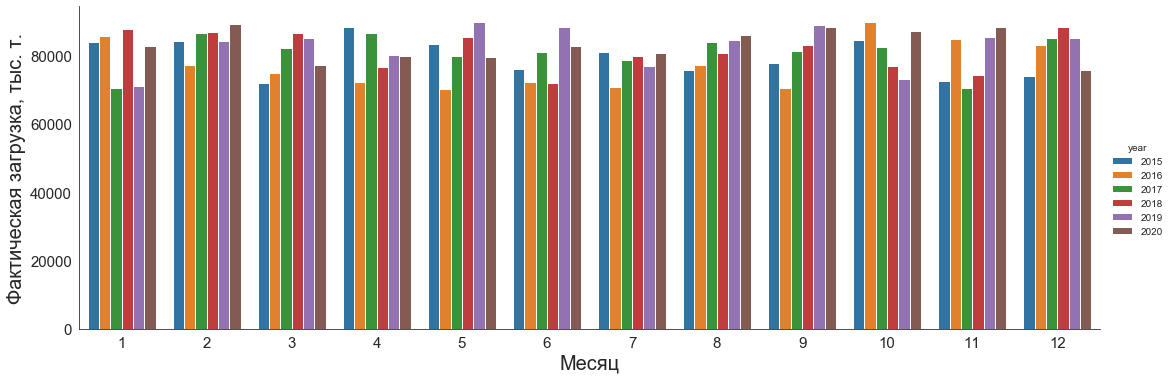

In [88]:
sns.catplot(data = df2, x='month', y='actual_load', hue='year', kind='bar', height=5, aspect=3)
plt.xlabel('Месяц', fontsize=20)
plt.ylabel('Фактическая загрузка, тыс. т.', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plots_project_2020_test/loads_by_month.png', bbox_inches='tight');

### 2. График загрузки по годам.

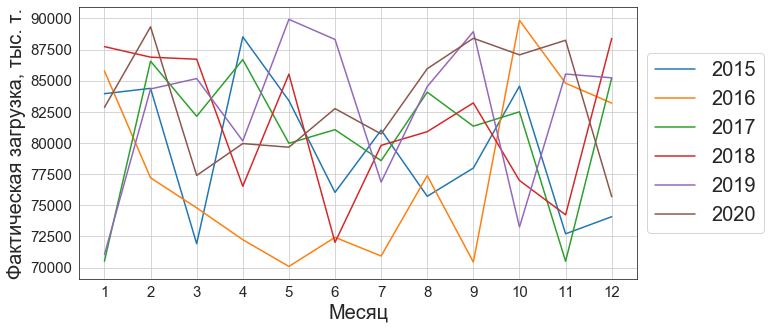

In [89]:
plt.figure(figsize=(10, 5))
for year in df2.groupby('year'):
    y, temp = year
    plt.plot(temp['month'], temp['actual_load'], label=y)
plt.xlabel('Месяц', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Фактическая загрузка, тыс. т.', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(list(range(1, 13)))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.grid()
plt.savefig('plots_project_2020_test/loads_by_year.png', bbox_inches='tight');

### 3. График загрузки за все года.

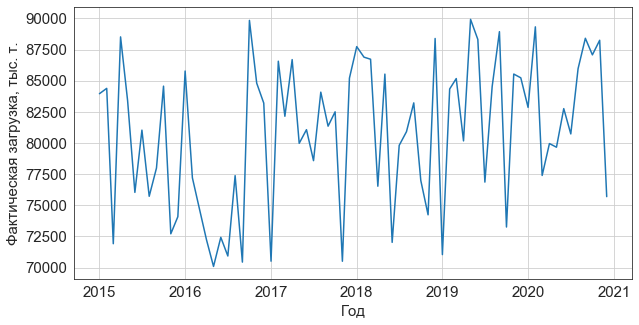

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(df2['Дата'], df2['actual_load'])
plt.xlabel('Год', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Фактическая загрузка, тыс. т.', fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('plots_project_2020_test/load2015_2020.png', bbox_inches='tight');

### Смоделируем корелляцию расхода "Детали 1" с загрузкой.

In [91]:
np.random.seed(12)
loads = df2[['Дата', 'actual_load']]
noise = 10 * np.random.uniform(-1, 1, size = loads.shape[0])
noise = noise.astype(int)
loads['rate1'] = np.round(30 * (loads['actual_load'] - loads['actual_load'].min()) / \
                    (loads['actual_load'].max() - loads['actual_load'].min()) + noise).astype(int)
loads.loc[loads['rate1'] < 0, 'rate1'] = 0
print('Корелляция:', loads['actual_load'].corr(loads['rate1']))
loads.head()

Корелляция: 0.8432282944292492


,Дата,actual_load,rate1
0,2015-01-01,83957,15
1,2015-02-01,84386,26
2,2015-03-01,71912,0
3,2015-04-01,88519,28
4,2015-05-01,83399,11


### Посмотрим на графики

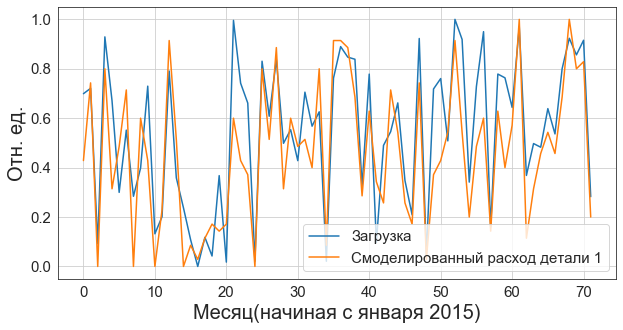

In [92]:
plt.figure(figsize=(10, 5))
plt.plot((loads['actual_load'] - loads['actual_load'].min()) / \
                    (loads['actual_load'].max() - loads['actual_load'].min()), label='Загрузка')
plt.plot(loads['rate1'] / loads['rate1'].max(), label='Смоделированный расход детали 1')
plt.legend(fontsize=15)
plt.xlabel('Месяц(начиная с января 2015)', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Отн. ед.', fontsize=20)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('plots_project_2020_test/load_vs_ratemod.png', bbox_inches='tight');


### Из приложения 1 посчитаем сколько расходуется каждой детали в месяц по всем тех. местам каждый год.

In [93]:
ratebyYear = df1.groupby(['year', 'month', 'Наименование ОЗМ']).sum().reset_index()

In [94]:
ratebyYear.head()

,year,month,Наименование ОЗМ,ОЗМ,"количество, шт","Цена, руб.","Сумма, руб."
0,2015,1,Деталь 1,1234567,5,10000,50000
1,2015,1,Деталь 10,1034567,20,10000,200000
2,2015,1,Деталь 2,2234567,7,10000,70000
3,2015,1,Деталь 3,3234567,24,10000,240000
4,2015,1,Деталь 4,4234567,31,10000,310000


### Заменим расход 1-й детали на смоделированный

In [95]:
idx1 = ratebyYear.loc[ratebyYear['Наименование ОЗМ'] == 'Деталь 1'].index
ratebyYear.loc[ratebyYear['Наименование ОЗМ'] == 'Деталь 1', 'количество, шт'] = loads[['rate1']].set_index(idx1)['rate1']
ratebyYear.head()

,year,month,Наименование ОЗМ,ОЗМ,"количество, шт","Цена, руб.","Сумма, руб."
0,2015,1,Деталь 1,1234567,15,10000,50000
1,2015,1,Деталь 10,1034567,20,10000,200000
2,2015,1,Деталь 2,2234567,7,10000,70000
3,2015,1,Деталь 3,3234567,24,10000,240000
4,2015,1,Деталь 4,4234567,31,10000,310000


### Создадим обучающую и тестовые выборки.

In [96]:
load_train = df2[~(df2['year'] == 2020)]
load_test = df2[df2['year'] == 2020]
rate_train = ratebyYear[~(ratebyYear['year'] == 2020)]
rate_test = ratebyYear[(ratebyYear['year'] == 2020)]

### Найдем, сколько помесячно расходуется каждой детали каждый год.

In [97]:
ratebyYear_pivot = rate_train.pivot_table(index=['Наименование ОЗМ', 'month', ], columns=['year', ], 
                values='количество, шт', fill_value=0, aggfunc='sum').reset_index()
ratebyYear_pivot.columns.name = None
ratebyYear_pivot.head(24)

,Наименование ОЗМ,month,2015,2016,2017,2018,2019
0,Деталь 1,1,15,32,0,32,1
1,Деталь 1,2,26,18,28,31,13
2,Деталь 1,3,0,0,18,24,15
3,Деталь 1,4,28,3,31,10,19
4,Деталь 1,5,11,1,11,22,32
5,Деталь 1,6,17,4,21,12,19
6,Деталь 1,7,25,6,17,9,7
7,Деталь 1,8,0,5,18,25,17
8,Деталь 1,9,21,6,14,19,21
9,Деталь 1,10,15,21,28,9,5


### Добавим колонки со средними, минимальными и максимальными значениями

In [98]:
ratebyYear_pivot['Low'] = ratebyYear_pivot[YEARS].min(axis=1)
ratebyYear_pivot['High'] = ratebyYear_pivot[YEARS].max(axis=1)
ratebyYear_pivot['Avg'] = np.ceil(ratebyYear_pivot[YEARS].mean(axis=1)).astype(int) # округляем в большую сторону до целого
ratebyYear_pivot.head()

,Наименование ОЗМ,month,2015,2016,2017,2018,2019,Low,High,Avg
0,Деталь 1,1,15,32,0,32,1,0,32,16
1,Деталь 1,2,26,18,28,31,13,13,31,24
2,Деталь 1,3,0,0,18,24,15,0,24,12
3,Деталь 1,4,28,3,31,10,19,3,31,19
4,Деталь 1,5,11,1,11,22,32,1,32,16


In [99]:
ratebyYear_pivot.head(12)

,Наименование ОЗМ,month,2015,2016,2017,2018,2019,Low,High,Avg
0,Деталь 1,1,15,32,0,32,1,0,32,16
1,Деталь 1,2,26,18,28,31,13,13,31,24
2,Деталь 1,3,0,0,18,24,15,0,24,12
3,Деталь 1,4,28,3,31,10,19,3,31,19
4,Деталь 1,5,11,1,11,22,32,1,32,16
5,Деталь 1,6,17,4,21,12,19,4,21,15
6,Деталь 1,7,25,6,17,9,7,6,25,13
7,Деталь 1,8,0,5,18,25,17,0,25,13
8,Деталь 1,9,21,6,14,19,21,6,21,17
9,Деталь 1,10,15,21,28,9,5,5,28,16


### Получается, что колонка 'Avg' - есть предсказание.

### Соединим таблицы ratebyYear и df2 так чтобы месячному расходу детали соответствовала месячная загрузка производства.

In [100]:
rate_loadbyYear = ratebyYear.merge(load_train[['year', 'month', 'actual_load']], on=['year', 'month'])
rate_loadbyYear

,year,month,Наименование ОЗМ,ОЗМ,"количество, шт","Цена, руб.","Сумма, руб.",actual_load
0,2015,1,Деталь 1,1234567,15,10000,50000,83957
1,2015,1,Деталь 10,1034567,20,10000,200000,83957
2,2015,1,Деталь 2,2234567,7,10000,70000,83957
3,2015,1,Деталь 3,3234567,24,10000,240000,83957
4,2015,1,Деталь 4,4234567,31,10000,310000,83957
...,...,...,...,...,...,...,...,...
595,2019,12,Деталь 5,5234567,33,10000,330000,85231
596,2019,12,Деталь 6,6234567,33,10000,330000,85231
597,2019,12,Деталь 7,7234567,15,10000,150000,85231
598,2019,12,Деталь 8,8234567,28,10000,280000,85231


### Для каждой детали найдем коэффициент корелляции загрузки с расходом.

In [101]:
details = rate_loadbyYear['Наименование ОЗМ'].unique()
coeff_table = pd.DataFrame(index=details, columns=['Correlation'])
for d in details:
    rate = rate_loadbyYear.loc[rate_loadbyYear['Наименование ОЗМ'] == d]['количество, шт']
    load = rate_loadbyYear.loc[rate_loadbyYear['Наименование ОЗМ'] == d]['actual_load']
    coeff_table.loc[d, 'Correlation'] = rate.corr(load)

coeff_table

,Correlation
Деталь 1,0.823403
Деталь 10,0.0408239
Деталь 2,-0.365165
Деталь 3,-0.184218
Деталь 4,0.108197
Деталь 5,0.0908406
Деталь 6,0.109301
Деталь 7,-0.0912939
Деталь 8,0.0421231
Деталь 9,-0.00898753


### Отбираем детали, для которых корреляция расхода с загрузкой > 0.8

In [102]:
coeff_table[coeff_table['Correlation'].abs() > 0.8]

,Correlation
Деталь 1,0.823403


In [103]:
correlated_details = coeff_table[coeff_table['Correlation'] > 0.8].index.to_list()
correlated_details

['Деталь 1']

### Для прогнозирования этих деталей нам нужен план загрузки на 2020 год.
Это load_test

In [104]:
load_test

,Дата,actual_load,month,year
60,2020-01-01,82857,1,2020
61,2020-02-01,89324,2,2020
62,2020-03-01,77393,3,2020
63,2020-04-01,79953,4,2020
64,2020-05-01,79660,5,2020
65,2020-06-01,82759,6,2020
66,2020-07-01,80727,7,2020
67,2020-08-01,85966,8,2020
68,2020-09-01,88407,9,2020
69,2020-10-01,87076,10,2020


### Строим прогноз для деталей, расход которых кореллирует с загрузкой.

In [105]:
load_plan = load_test['actual_load'].values.reshape(-1, 1) # план загрузки на следующий год

predictions = [] # сюда будем добавлять предсказания для каждой детали
for detail in correlated_details:
    
    # создадим таблицу с колонкой деталь и месяц
    df_pred = pd.DataFrame({'Наименование ОЗМ': [detail] * len(load_plan)})
    df_pred['month'] = list(range(1, 13))
    
    # отбираем из таблицы rate_loadbyYear данные расхода этой детали и загрузки производства
    
    rate = rate_loadbyYear.loc[rate_loadbyYear['Наименование ОЗМ'] == detail]['количество, шт']
    load = rate_loadbyYear.loc[rate_loadbyYear['Наименование ОЗМ'] == detail]['actual_load']
    
    # Обучаем на них модель
    model = LinearRegression()
    model.fit(load.values.reshape(-1, 1), rate.values.reshape(-1, 1))

    # Делаем предсказания на обучающей и тестовой выборках
    rate_pred_train = model.predict(load.values.reshape(-1, 1)) # предсказание на обучающей выборке
    rate_predict = model.predict(load_plan) # предсказание на обучающей выборке
    df_pred['prediction'] = np.ceil(np.ravel(rate_predict)).astype(int)
    
    # добавляем в список предсказаний
    predictions.append(df_pred)

predictions = pd.concat(predictions, axis=0, ignore_index=True) # соединяем таблицы предсказий в одну таблицу
predictions

,Наименование ОЗМ,month,prediction
0,Деталь 1,1,19
1,Деталь 1,2,28
2,Деталь 1,3,12
3,Деталь 1,4,15
4,Деталь 1,5,15
5,Деталь 1,6,19
6,Деталь 1,7,16
7,Деталь 1,8,23
8,Деталь 1,9,27
9,Деталь 1,10,25


### Предсказание обученной регрессионной модели на исторических данных расхода.

Качество модели MАE:  4.598268936341626


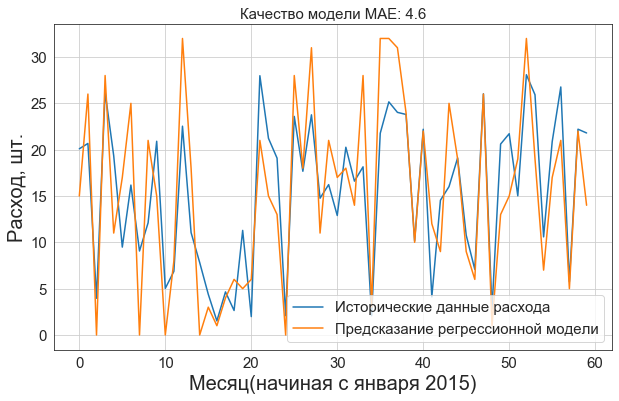

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(rate_pred_train, label='Исторические данные расхода')
plt.plot(rate.values.reshape(-1, 1), label='Предсказание регрессионной модели')
plt.legend(fontsize=15)
plt.xlabel('Месяц(начиная с января 2015)', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Расход, шт.', fontsize=20)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.title('Качество модели MАE: {:.3}'.format(mean_absolute_error(rate.values.reshape(-1, 1), rate_pred_train)), 
          fontsize=15
         )
print('Качество модели MАE: ', mean_absolute_error(rate.values.reshape(-1, 1), rate_pred_train))
plt.savefig('plots_project_2020_test/rate_vs_prediction.png', bbox_inches='tight');



### Соединим со сводной таблицей расходов по годам

In [107]:
stat_vs_pred = ratebyYear_pivot.merge(predictions, how='left', on=['Наименование ОЗМ', 'month'])
stat_vs_pred.fillna('No prediction', inplace=True)
display_df(stat_vs_pred)

Rows: 120
Columns: 11


,Наименование ОЗМ,month,2015,2016,2017,2018,2019,Low,High,Avg,prediction
0,Деталь 1,1,15,32,0,32,1,0,32,16,19
1,Деталь 1,2,26,18,28,31,13,13,31,24,28
2,Деталь 1,3,0,0,18,24,15,0,24,12,12
3,Деталь 1,4,28,3,31,10,19,3,31,19,15
4,Деталь 1,5,11,1,11,22,32,1,32,16,15


,Наименование ОЗМ,month,2015,2016,2017,2018,2019,Low,High,Avg,prediction
115,Деталь 9,8,13,11,20,14,12,11,20,14,No prediction
116,Деталь 9,9,30,7,4,8,19,4,30,14,No prediction
117,Деталь 9,10,31,24,12,25,9,9,31,21,No prediction
118,Деталь 9,11,8,5,26,31,16,5,31,18,No prediction
119,Деталь 9,12,18,31,31,5,32,5,32,24,No prediction


### Теперь необходимо последовательно провести корректировки:
    - 1. По статистическим данным
    - 2. По данным наработки каждой детали
    - 3. По результатм осмотра на наличие замечаний
    - 4. По результатам диагностики
    - 5. По складским остаткам.
    
#### Для корректировки по наработке, осмотру, диагностике и остаткам составляются однотипные таблицы со следующими столбцами:
      Наименование_ОЗМ	|    Месяц	|    Название_корректировки
      __________________|___________|___________________________
      
    - Наименование_ОЗМ - название детали, по которой требуется обеспечить необходимое кол-во
    - Месяц - месяц, в котором необходимо обеспечить необходимое колич-во
    - Название_корректировки - необходимое количество

#### 1. Для корректировки статистическими данными напишем отдельную функцию, которая будет вызываться внутри общей функции корректировки.

In [108]:
def statistical_correction(row):
    if row.loc['prediction'] != 'No prediction':
        if row.loc['prediction'] < row.loc['Low']:
            return row.loc['Low']
        elif row.loc['prediction'] > row.loc['High']:
            return row.loc['High']
        else:
            return row.loc['prediction']
    else:
        return row.loc['Avg']

#### 2. Наработка.

In [109]:
df3 = df['Приложение 3']

# Добавим столбец Наименование ОЗМ, т.к. он отсутствует в это таблице
df3.rename(columns={'Деталь': 'ОЗМ'}, inplace=True)
df3 = df3.merge(df_ozm.drop('№ пп', axis=1), on='ОЗМ')

# Добавим столбцы необходимых расходов в январе и феврале
df3['Закупить янв'] = (((df3['Паспортный срок эксплуатации'] - df3['срок наработки']) / \
                   df3['Паспортный срок эксплуатации']) < 0.5).astype(int)
df3['Закупить фев'] = (((df3['Паспортный срок эксплуатации'] - df3['срок наработки']) / \
                   df3['Паспортный срок эксплуатации']) > 0.5).astype(int)

display_df(df3)

print('\n----------Искомая таблица для корректировки по наработке---------')
print('----------Должно быть обеспечено на январь/февраль.---------\n')
operating = df3.groupby('Наименование ОЗМ')[['Закупить янв', 'Закупить фев']].sum().stack().reset_index()
operating.rename(columns={'level_1': 'month', 0: 'operating'}, inplace=True)
operating['month'] = np.where(operating['month']=='Закупить янв', 1, 2)
operating = operating.sort_values(['month', 'Наименование ОЗМ']).reset_index().drop('index', axis=1)
display_df(operating)

Rows: 100
Columns: 8


,Дата установки,Техническое место,ОЗМ,срок наработки,Паспортный срок эксплуатации,Наименование ОЗМ,Закупить янв,Закупить фев
0,2020-11-12,Тех. место 1,1234567,1176,1400,Деталь 1,1,0
1,2020-11-17,Тех. место 2,1234567,1056,1400,Деталь 1,1,0
2,2020-12-21,Тех. место 3,1234567,240,1400,Деталь 1,0,1
3,2020-11-17,Тех. место 4,1234567,1056,1400,Деталь 1,1,0
4,2020-11-26,Тех. место 5,1234567,840,1400,Деталь 1,1,0


,Дата установки,Техническое место,ОЗМ,срок наработки,Паспортный срок эксплуатации,Наименование ОЗМ,Закупить янв,Закупить фев
95,2020-12-01,Тех. место 6,1034567,720,1400,Деталь 10,1,0
96,2020-10-31,Тех. место 7,1034567,1464,1400,Деталь 10,1,0
97,2020-11-24,Тех. место 8,1034567,888,1400,Деталь 10,1,0
98,2020-11-07,Тех. место 9,1034567,1296,1400,Деталь 10,1,0
99,2020-12-13,Тех. место 10,1034567,1368,1400,Деталь 10,1,0



----------Искомая таблица для корректировки по наработке---------
----------Должно быть обеспечено на январь/февраль.---------

Rows: 20
Columns: 3


,Наименование ОЗМ,month,operating
0,Деталь 1,1,5
1,Деталь 10,1,7
2,Деталь 2,1,4
3,Деталь 3,1,5
4,Деталь 4,1,4
5,Деталь 5,1,4
6,Деталь 6,1,5
7,Деталь 7,1,3
8,Деталь 8,1,7
9,Деталь 9,1,4


#### 3.Корректировка по результатам осмотра в декабре 2020.

In [110]:
df4 = df['Приложение 4']

df4.rename(columns={'Месяц':'Дата', 'Деталь': 'ОЗМ'}, inplace=True)

df4 = df4.merge(df_ozm.drop('№ пп', axis=1), on='ОЗМ')

# Добавим колонки месяца и года
df4['month'] = df4['Дата'].dt.month
df4['year'] = df4['Дата'].dt.year


display_df(df4)

# Посчитаем замечания по каждой детали на декабрь.

df4_december = df4[df4['month']==12].copy()

# закодируем '1' замечания, иначе '0'
df4_december['inspection'] = np.where(df4_december['Наличие замечаний']=='Есть замечания', 1, 0)
df4_december.head()

print('\n----------Искомая таблица для корректировки по результатам осмотра в декабре---------')
print('----------Должно быть обеспечено на январь---------\n')

inspection = df4_december.groupby(['Наименование ОЗМ', 'month'])[['inspection']].sum().reset_index()
inspection['month'] = 1
display_df(inspection)

Rows: 600
Columns: 7


,Дата,Тех. место,ОЗМ,Наличие замечаний,Наименование ОЗМ,month,year
0,2020-07-01,Тех. место 1,1234567,Есть замечания,Деталь 1,7,2020
1,2020-07-01,Тех. место 2,1234567,Нет замечаний,Деталь 1,7,2020
2,2020-07-01,Тех. место 3,1234567,Есть замечания,Деталь 1,7,2020
3,2020-07-01,Тех. место 4,1234567,Нет замечаний,Деталь 1,7,2020
4,2020-07-01,Тех. место 5,1234567,Нет замечаний,Деталь 1,7,2020


,Дата,Тех. место,ОЗМ,Наличие замечаний,Наименование ОЗМ,month,year
595,2020-12-01,Тех. место 6,1034567,Нет замечаний,Деталь 10,12,2020
596,2020-12-01,Тех. место 7,1034567,Нет замечаний,Деталь 10,12,2020
597,2020-12-01,Тех. место 8,1034567,Нет замечаний,Деталь 10,12,2020
598,2020-12-01,Тех. место 9,1034567,Есть замечания,Деталь 10,12,2020
599,2020-12-01,Тех. место 10,1034567,Нет замечаний,Деталь 10,12,2020



----------Искомая таблица для корректировки по результатам осмотра в декабре---------
----------Должно быть обеспечено на январь---------

Rows: 10
Columns: 3


,Наименование ОЗМ,month,inspection
0,Деталь 1,1,6
1,Деталь 10,1,4
2,Деталь 2,1,6
3,Деталь 3,1,5
4,Деталь 4,1,5
5,Деталь 5,1,5
6,Деталь 6,1,6
7,Деталь 7,1,6
8,Деталь 8,1,7
9,Деталь 9,1,5


#### 4. Корректировка по результатам диагностики в декабре.

In [111]:
df5 = df['Приложение 5']
df5.rename(columns={'Месяц':'Дата', 'Деталь': 'ОЗМ'}, inplace=True)

df5 = df5.merge(df_ozm.drop('№ пп', axis=1), on='ОЗМ')


# Закодируем детали в критическом состоянии 1, остальные 0
df5['diagnostic'] = np.where(df5['Данные диагностики']=='Критичное состояние', 1, 0)
display_df(df5)

print('\n----------Искомая таблица для корректировки по результатам диагностики в декабре---------')
print('----------Должно быть обеспечено на январь---------\n')

diagnostic = df5.groupby(['Наименование ОЗМ'])[['diagnostic']].sum().reset_index()
diagnostic.insert(1, 'month', 1)
display_df(diagnostic)

Rows: 100
Columns: 6


,Дата,Тех. место,ОЗМ,Данные диагностики,Наименование ОЗМ,diagnostic
0,2020-12-01,Тех. место 1,1234567,Нет замечаний,Деталь 1,0
1,2020-12-01,Тех. место 2,1234567,Критичное состояние,Деталь 1,1
2,2020-12-01,Тех. место 3,1234567,Нет замечаний,Деталь 1,0
3,2020-12-01,Тех. место 4,1234567,Удовлетворительное состояние,Деталь 1,0
4,2020-12-01,Тех. место 5,1234567,Удовлетворительное состояние,Деталь 1,0


,Дата,Тех. место,ОЗМ,Данные диагностики,Наименование ОЗМ,diagnostic
95,2020-12-01,Тех. место 6,1034567,Нет замечаний,Деталь 10,0
96,2020-12-01,Тех. место 7,1034567,Критичное состояние,Деталь 10,1
97,2020-12-01,Тех. место 8,1034567,Удовлетворительное состояние,Деталь 10,0
98,2020-12-01,Тех. место 9,1034567,Критичное состояние,Деталь 10,1
99,2020-12-01,Тех. место 10,1034567,Удовлетворительное состояние,Деталь 10,0



----------Искомая таблица для корректировки по результатам диагностики в декабре---------
----------Должно быть обеспечено на январь---------

Rows: 10
Columns: 3


,Наименование ОЗМ,month,diagnostic
0,Деталь 1,1,1
1,Деталь 10,1,3
2,Деталь 2,1,2
3,Деталь 3,1,6
4,Деталь 4,1,4
5,Деталь 5,1,4
6,Деталь 6,1,3
7,Деталь 7,1,3
8,Деталь 8,1,5
9,Деталь 9,1,3


#### 5. Корректировка по остаткам на складах.
Смоделируем остатки на складах каждой детали.

In [112]:
stock_balances = pd.DataFrame(DETAILS, columns=['Наименование ОЗМ'])
stock_balances['month'] = 1
stock_balances['stock'] = np.random.randint(0, 7, len(DETAILS))
stock_balances

,Наименование ОЗМ,month,stock
0,Деталь 1,1,3
1,Деталь 2,1,4
2,Деталь 3,1,2
3,Деталь 4,1,4
4,Деталь 5,1,0
5,Деталь 6,1,0
6,Деталь 7,1,4
7,Деталь 8,1,4
8,Деталь 9,1,4
9,Деталь 10,1,3


### Функция, которая применяет к заданному столбцу заданную корректировку.

In [113]:
def correction(df_with_prediction, column_to_correct=None, df_correction=None, correct_by='statistic'):
    
    if not column_to_correct:
        # если столбец для корректировки не указан, то берем последний
        column_to_correct = df_with_prediction.columns[-1]
    
    # название скорректированного столбца составляем из названия корректировки
    corrected_col = correct_by + '_corr'
    
    # создаем столбец для скорректированных значений
    df_with_prediction[corrected_col] = df_with_prediction[column_to_correct]
    
    # если корректировка статистическими данными, то построчно применяем функцию statistic_correction
    if correct_by == 'statistic':
        df_with_prediction[corrected_col] = df_with_prediction.apply(statistical_correction, axis=1)
        
    # иначе ищем в таблице df_with_prediction ЧТО исправить, а в таблице df_correction НА ЧТО исправить
    else:
        for d in DETAILS:
            for month in df_correction['month'].unique():
                
                # ЧТО исправить
                value_to_correct = df_with_prediction.loc[(df_with_prediction['Наименование ОЗМ']==d) & \
                                       (df_with_prediction['month'] == month)][corrected_col].values[0]
                
                # НА ЧТО исправить
                correction_value = df_correction.loc[(df_correction['Наименование ОЗМ']==d) & \
                                       (df_correction['month'] == month)][correct_by].values[0]


                # находим индекс строки где стоит значение для корректировки
                idx = df_with_prediction.loc[(df_with_prediction['Наименование ОЗМ']==d) & \
                        (df_with_prediction['month'] == month)].index[0]
                
                if correct_by == 'stock':
                    # если корректировка по складу, то вычитаем остатки и возвращем 0, если остатков больше
                    df_with_prediction[corrected_col][idx] = max(0, value_to_correct - correction_value)
                else:
                    # иначе меняем в прогнозе значение на максимальное м/у корр-мым и корр-щим значениями
                    df_with_prediction[corrected_col][idx] = max(correction_value, value_to_correct)

    return df_with_prediction
        

In [114]:
correction(stat_vs_pred, column_to_correct='prediction')
correction(stat_vs_pred, df_correction=operating, correct_by='operating')
correction(stat_vs_pred, column_to_correct='operating_corr', df_correction=inspection, correct_by='inspection')
correction(stat_vs_pred, df_correction=diagnostic, correct_by='diagnostic')
correction(stat_vs_pred, df_correction=stock_balances, correct_by='stock')
stat_vs_pred.head()

,Наименование ОЗМ,month,2015,2016,2017,2018,2019,Low,High,Avg,prediction,statistic_corr,operating_corr,inspection_corr,diagnostic_corr,stock_corr
0,Деталь 1,1,15,32,0,32,1,0,32,16,19,19.0,19.0,19.0,19.0,16.0
1,Деталь 1,2,26,18,28,31,13,13,31,24,28,28.0,28.0,28.0,28.0,28.0
2,Деталь 1,3,0,0,18,24,15,0,24,12,12,12.0,12.0,12.0,12.0,12.0
3,Деталь 1,4,28,3,31,10,19,3,31,19,15,15.0,15.0,15.0,15.0,15.0
4,Деталь 1,5,11,1,11,22,32,1,32,16,15,15.0,15.0,15.0,15.0,15.0


## Теперь посчитаем расход каждой детали в месяц по плану составленному стандартным образом.

In [115]:
# Считываем план
df6 = df['Приложение 6']

# Добавим колонку 'Наименование ОЗМ', для этого надо переименовать колонку деталь в "ОЗМ" и соединить с таблицей
# df_ozm

df6.rename(columns={'Месяц':'Дата', 'Деталь': 'ОЗМ'}, inplace=True)

df6 = df6.merge(df_ozm.drop('№ пп', axis=1), on='ОЗМ')

# Добавим колонки месяца и года
df6['month'] = df6['Дата'].dt.month
df6['year'] = df6['Дата'].dt.year
display_df(df6)

Rows: 1200
Columns: 7


,Дата,Тех. место,ОЗМ,План,Наименование ОЗМ,month,year
0,2021-01-01,Тех. место 1,1234567,29,Деталь 1,1,2021
1,2021-01-01,Тех. место 2,1234567,9,Деталь 1,1,2021
2,2021-01-01,Тех. место 3,1234567,32,Деталь 1,1,2021
3,2021-01-01,Тех. место 4,1234567,5,Деталь 1,1,2021
4,2021-01-01,Тех. место 5,1234567,11,Деталь 1,1,2021


,Дата,Тех. место,ОЗМ,План,Наименование ОЗМ,month,year
1195,2021-12-01,Тех. место 6,1034567,13,Деталь 10,12,2021
1196,2021-12-01,Тех. место 7,1034567,13,Деталь 10,12,2021
1197,2021-12-01,Тех. место 8,1034567,0,Деталь 10,12,2021
1198,2021-12-01,Тех. место 9,1034567,18,Деталь 10,12,2021
1199,2021-12-01,Тех. место 10,1034567,33,Деталь 10,12,2021


### Сгруппируем по названию детали и месяцу

In [116]:
plan = df6.groupby(['year', 'month', 'Наименование ОЗМ']).sum().reset_index()
plan.head(12)

,year,month,Наименование ОЗМ,ОЗМ,План
0,2021,1,Деталь 1,12345670,159
1,2021,1,Деталь 10,10345670,209
2,2021,1,Деталь 2,22345670,144
3,2021,1,Деталь 3,32345670,195
4,2021,1,Деталь 4,42345670,162
5,2021,1,Деталь 5,52345670,189
6,2021,1,Деталь 6,62345670,205
7,2021,1,Деталь 7,72345670,105
8,2021,1,Деталь 8,82345670,166
9,2021,1,Деталь 9,92345670,192


### Заменим план на более реальные значения.

In [117]:
np.random.seed(12)
rnd_plan = np.random.normal(20, 10, size=plan.shape[0]).astype(int)
rnd_plan[rnd_plan < 0] = 0
plan['План'] = rnd_plan
plan['year'] = 2020
plan.head(10)

,year,month,Наименование ОЗМ,ОЗМ,План
0,2020,1,Деталь 1,12345670,24
1,2020,1,Деталь 10,10345670,13
2,2020,1,Деталь 2,22345670,22
3,2020,1,Деталь 3,32345670,2
4,2020,1,Деталь 4,42345670,27
5,2020,1,Деталь 5,52345670,4
6,2020,1,Деталь 6,62345670,20
7,2020,1,Деталь 7,72345670,18
8,2020,1,Деталь 8,82345670,11
9,2020,1,Деталь 9,92345670,48


### Добавим в план колонки с предсказаниями и реальным расходом в 2020г.

In [118]:
plan_vs_prediction = plan.merge(stat_vs_pred[['Наименование ОЗМ', 'month', 'diagnostic_corr', 'stock_corr']], 
           how='left', on=['Наименование ОЗМ', 'month'])
plan_vs_prediction_test = plan_vs_prediction.merge(rate_test[['Наименование ОЗМ', 'month', 'количество, шт']], 
                                                  how='left', on=['Наименование ОЗМ', 'month'])
plan_vs_prediction_test.rename(columns = {'diagnostic_corr': 'Предсказание с учетом корректировок', 
                                          'stock_corr': 'Предсказание с учетом складских остатков',
                                          'количество, шт': 'Реальный расход в 2020'
                          }, inplace=True)
display_df(plan_vs_prediction_test)

Rows: 120
Columns: 8


,year,month,Наименование ОЗМ,ОЗМ,План,Предсказание с учетом корректировок,Предсказание с учетом складских остатков,Реальный расход в 2020
0,2020,1,Деталь 1,12345670,24,19.0,16.0,20
1,2020,1,Деталь 10,10345670,13,8.0,5.0,9
2,2020,1,Деталь 2,22345670,22,19.0,15.0,16
3,2020,1,Деталь 3,32345670,2,17.0,15.0,31
4,2020,1,Деталь 4,42345670,27,25.0,21.0,24


,year,month,Наименование ОЗМ,ОЗМ,План,Предсказание с учетом корректировок,Предсказание с учетом складских остатков,Реальный расход в 2020
115,2020,12,Деталь 5,52345670,13,16.0,16.0,33
116,2020,12,Деталь 6,62345670,6,22.0,22.0,32
117,2020,12,Деталь 7,72345670,29,10.0,10.0,22
118,2020,12,Деталь 8,82345670,7,13.0,13.0,17
119,2020,12,Деталь 9,92345670,7,24.0,24.0,18


In [119]:
to_plot = plan_vs_prediction_test.groupby('Наименование ОЗМ').sum().drop(['month', 'year', 'ОЗМ'], axis=1).reset_index()
to_plot

,Наименование ОЗМ,План,Предсказание с учетом корректировок,Предсказание с учетом складских остатков,Реальный расход в 2020
0,Деталь 1,223,225.0,222.0,244
1,Деталь 10,203,211.0,208.0,150
2,Деталь 2,278,184.0,180.0,156
3,Деталь 3,244,217.0,215.0,194
4,Деталь 4,291,194.0,190.0,155
5,Деталь 5,179,191.0,191.0,237
6,Деталь 6,163,212.0,212.0,185
7,Деталь 7,210,203.0,199.0,199
8,Деталь 8,168,208.0,204.0,144
9,Деталь 9,235,215.0,211.0,196


Качество плана MAE:  13.62
Качество модели с корректировками MAE:  8.12
Качество модели с учетом склада MAE:  8.15


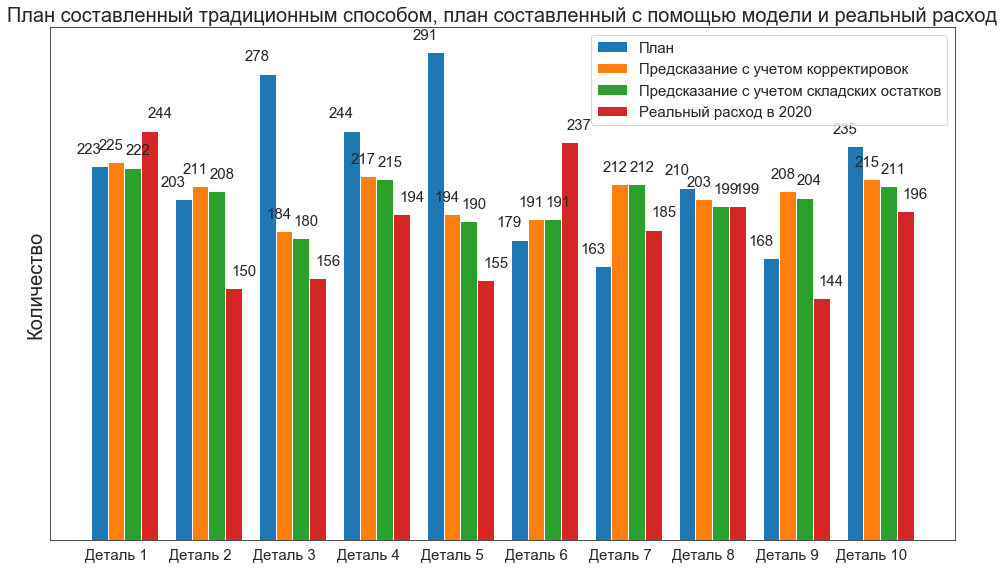

In [120]:
labels = DETAILS
cols_to_plot = to_plot.columns[1: ]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(15,8))
rectangles = []
for i, c in enumerate(cols_to_plot):
    rects = ax.bar(x - width + width*i, to_plot[c].astype(int), width, label=c)
    rectangles.append(rects)

ax.set_ylabel('Количество', fontsize=20)
ax.set_title('План составленный традиционным способом, план составленный с помощью модели и реальный расход', fontsize=20)
ax.set_xticks(x)
ax.set_yticks([])
ax.set_xticklabels(labels, fontsize=15)
ax.legend(fontsize=15)

def autolabel(rects, shift):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(shift, 10),
                    textcoords="offset points",
                    fontsize=15,
                    ha='center', va='bottom')

shifts = [-10, -5, 5, 10]

for i, rect in enumerate(rectangles):
    autolabel(rect, shifts[i])

fig.tight_layout()
plt.savefig('plots_project_2020_test/plan_comparison.png')

target_rate = plan_vs_prediction_test['Реальный расход в 2020']
plan_prediction = plan_vs_prediction_test['План']
model_prediction = plan_vs_prediction_test['Предсказание с учетом корректировок']
model_prediction_stock = plan_vs_prediction_test['Предсказание с учетом складских остатков']

print('Качество плана MAE: ', np.round(mean_absolute_error(target_rate, plan_prediction), 2))
print('Качество модели с корректировками MAE: ', np.round(mean_absolute_error(target_rate, model_prediction), 2))
print('Качество модели с учетом склада MAE: ', np.round(mean_absolute_error(target_rate, model_prediction_stock), 2))